In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
df.data, df.target

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
regression.coef_

array([ 0.83267819,  0.11676197, -0.25636449,  0.28545604, -0.00850675,
       -0.04032406, -0.88696132, -0.85600906])

In [8]:
y_pred_linear = regression.predict(x_test_scaled)
y_pred_linear, y_test

(array([ 1.36656756,  1.9256742 ,  2.87618498, ..., -0.34286879,
         1.48686135,  1.05842704]),
 array([1.026, 2.144, 3.638, ..., 0.275, 1.118, 0.6  ]))

In [9]:
from sklearn.linear_model import Ridge

# Гребнева регресія
regression_ridge = Ridge()

In [10]:
from sklearn.linear_model import Lasso

regression_lasso = Lasso()

In [11]:
from sklearn.linear_model import PoissonRegressor

regression_poisson = PoissonRegressor()

In [12]:
models = {
    "Linear regression": regression,
    "Ridge regression": regression_ridge,
    "Lasso regression": regression_lasso,
    "Poisson regression": regression_poisson
}

models_results = {
    "Linear regression": [],
    "Ridge regression": [],
    "Lasso regression": [],
    "Poisson regression": []
}

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

for model_name, model in models.items():    
    for n in [2, 4, 8]:
        x_train_sub = x_train_scaled[:, :n]
        x_test_sub = x_test_scaled[:, :n]

        model.fit(x_train_sub, y_train)
        print(f"{model_name} coef. with {n} features: {model.coef_}")
        
        y_pred = model.predict(x_test_sub)
        temp = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
        models_results[model_name].append([f"{value:.2f}" for value in temp])
    print()

Linear regression coef. with 2 features: [0.81880112 0.21949299]
Linear regression coef. with 4 features: [ 1.02733416  0.19536765 -0.51345148  0.4415688 ]
Linear regression coef. with 8 features: [ 0.83267819  0.11676197 -0.25636449  0.28545604 -0.00850675 -0.04032406
 -0.88696132 -0.85600906]

Ridge regression coef. with 2 features: [0.81874906 0.21947321]
Ridge regression coef. with 4 features: [ 1.02705807  0.1953698  -0.51293531  0.44110043]
Ridge regression coef. with 8 features: [ 0.83265667  0.11684143 -0.25624435  0.28528172 -0.00847919 -0.04032888
 -0.88619438 -0.85523666]

Lasso regression coef. with 2 features: [0. 0.]
Lasso regression coef. with 4 features: [ 0.  0.  0. -0.]
Lasso regression coef. with 8 features: [ 0.  0.  0. -0. -0. -0. -0. -0.]

Poisson regression coef. with 2 features: [0.22593701 0.05545608]
Poisson regression coef. with 4 features: [ 0.2233437   0.0556      0.00866796 -0.01189914]
Poisson regression coef. with 8 features: [ 0.21782228  0.05322826  0.

In [14]:
models_results

{'Linear regression': [['0.64', '0.52'], ['0.61', '0.54'], ['0.50', '0.62']],
 'Ridge regression': [['0.64', '0.52'], ['0.61', '0.54'], ['0.50', '0.62']],
 'Lasso regression': [['1.33', '-0.00'], ['1.33', '-0.00'], ['1.33', '-0.00']],
 'Poisson regression': [['0.76', '0.43'], ['0.76', '0.43'], ['0.72', '0.46']]}

In [48]:
import pandas as pd

table1_data = {
    'Model': list(models_results.keys()),
    '2 features': [float(result[0][0]) for result in models_results.values()],
    '4 features': [float(result[1][0]) for result in models_results.values()],
    '8 features': [float(result[2][0]) for result in models_results.values()],
}

table1 = pd.DataFrame(table1_data)
table1.set_index('Model', inplace=True)

table2_data = {
    'Model': list(models_results.keys()),
    '2 features': [result[0][1] for result in models_results.values()],
    '4 features': [result[1][1] for result in models_results.values()],
    '8 features': [result[2][1] for result in models_results.values()],
}

table2 = pd.DataFrame(table2_data)
table2.set_index('Model', inplace=True)

In [49]:
table1

,2 features,4 features,8 features
Model,,,
Linear regression,0.64,0.61,0.50
Ridge regression,0.64,0.61,0.50
Lasso regression,1.33,1.33,1.33
Poisson regression,0.76,0.76,0.72


In [50]:
table2

,2 features,4 features,8 features
Model,,,
Linear regression,0.52,0.54,0.62
Ridge regression,0.52,0.54,0.62
Lasso regression,-0.00,-0.00,-0.00
Poisson regression,0.43,0.43,0.46


In [51]:
table1['Mean'] = table1.mean(axis=1)

table1

,2 features,4 features,8 features,Mean
Model,,,,
Linear regression,0.64,0.61,0.50,0.583333
Ridge regression,0.64,0.61,0.50,0.583333
Lasso regression,1.33,1.33,1.33,1.330000
Poisson regression,0.76,0.76,0.72,0.746667


In [78]:
regression_analyze = []

for n in [2, 4, 8]:
        x_train_sub = x_train_scaled[:, :n]
        x_test_sub = x_test_scaled[:, :n]

        regression.fit(x_train_sub, y_train)
        
        y_pred = regression.predict(x_test_sub)
        regression_analyze.append([y_test, y_pred])

regression_analyze

[[array([1.026, 2.144, 3.638, ..., 0.275, 1.118, 0.6  ]),
  array([1.16691845, 1.98265366, 2.76838503, ..., 0.73959284, 2.0651807 ,
         2.10915507])],
 [array([1.026, 2.144, 3.638, ..., 0.275, 1.118, 0.6  ]),
  array([1.15447056, 1.50852039, 3.01254149, ..., 0.74971125, 1.98085131,
         1.864289  ])],
 [array([1.026, 2.144, 3.638, ..., 0.275, 1.118, 0.6  ]),
  array([ 1.36656756,  1.9256742 ,  2.87618498, ..., -0.34286879,
          1.48686135,  1.05842704])]]

IndexError: list index out of range

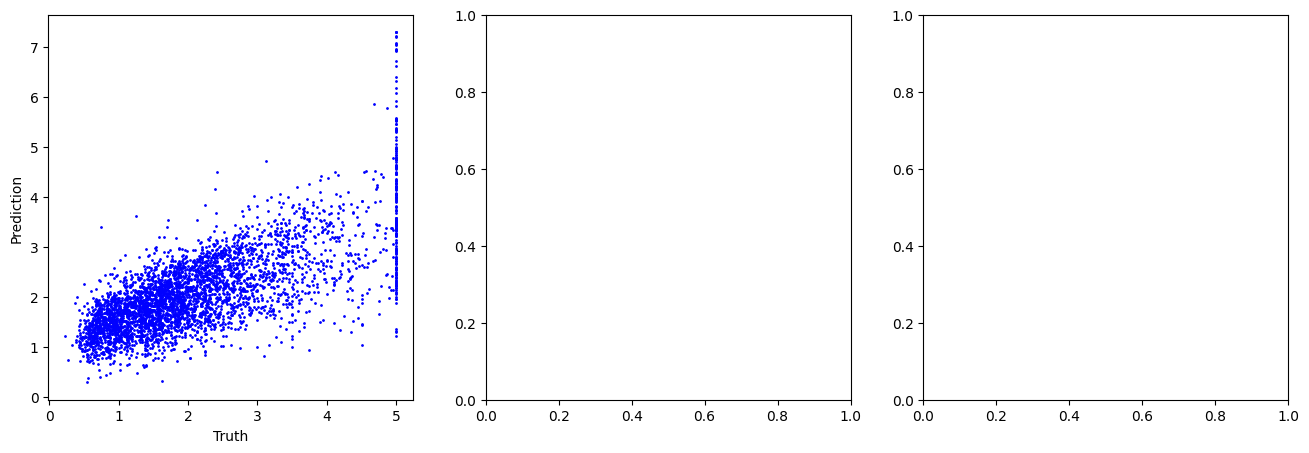

In [89]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

expected_color = 'blue'
# Колір для передбачених результатів (наприклад, червоний)
predicted_color = 'red'

for i, sublist in enumerate(regression_analyze):
    axs[i].scatter(sublist[0], sublist[1], s=1, c=expected_color, label='Truth')
    axs[i].set_xlabel('Truth')
    axs[i].set_ylabel('Prediction')

    # Додайте другий розсіювальний графік для передбачених результатів
    axs[i].scatter(sublist[0], sublist[2], s=1, c=predicted_color, label='Prediction')

    # Додайте легенду
    axs[i].legend()